<a href="https://colab.research.google.com/github/MStamirski/Optic-sensors/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analizing single datasets

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = "drive/MyDrive/Colab_Notebooks/SDA_Upskill/data/"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.options.display.float_format = '{:.9f}'.format

In [ ]:
def get_sensor_data(filename):
  records = []

  with open(path+filename+".txt") as file:
    for data in file:
      record = data.strip().split(',')
      records.append(record)
  
  df = pd.DataFrame.from_records(records,columns=['wavelength', 'amplitude'])
  df['wavelength'] = df['wavelength'].astype('float')
  df['amplitude'] = df['amplitude'].astype('float')

  return df

In [ ]:
S1a_df = get_sensor_data("sensor01_air")

In [ ]:
S1a_df

,wavelength,amplitude
0,0.000001350,9.179200000
1,0.000001350,9.200300000
2,0.000001350,9.196800000
3,0.000001350,9.102800000
4,0.000001350,9.060100000
...,...,...
2996,0.000001650,3.831000000
2997,0.000001650,3.861300000
2998,0.000001650,3.836100000
2999,0.000001650,3.946600000


In [ ]:
S1a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wavelength  3001 non-null   float64
 1   amplitude   3001 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [ ]:
S1a_df.describe()

,wavelength,amplitude
count,3001.000000000,3001.000000000
mean,0.000001500,1.190376147
std,0.000000087,4.724187412
min,0.000001350,-7.151200000
25%,0.000001425,-2.634700000
50%,0.000001500,1.616400000
75%,0.000001575,4.885600000
max,0.000001650,9.253300000


In [ ]:
S1w_df = get_sensor_data("sensor01_water")

In [ ]:
S1w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wavelength  3001 non-null   float64
 1   amplitude   3001 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [ ]:
S1w_df.describe()

,wavelength,amplitude
count,3001.000000000,3001.000000000
mean,0.000001500,-1.401315113
std,0.000000087,6.367353501
min,0.000001350,-13.115000000
25%,0.000001425,-6.288800000
50%,0.000001500,-1.402100000
75%,0.000001575,4.478600000
max,0.000001650,8.561300000


In [ ]:
S1i_df = get_sensor_data("sensor01_izopropanol")

In [ ]:
S1i_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wavelength  3001 non-null   float64
 1   amplitude   3001 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [ ]:
S1i_df.describe()

,wavelength,amplitude
count,3001.000000000,3001.000000000
mean,0.000001500,-1.519056685
std,0.000000087,6.865805716
min,0.000001350,-15.325000000
25%,0.000001425,-6.467500000
50%,0.000001500,-1.217200000
75%,0.000001575,4.758900000
max,0.000001650,8.787400000


In [ ]:
S1i_df.isna().sum()

wavelength    0
amplitude     0
dtype: int64

In [ ]:
S1i_df.count()

wavelength    3001
amplitude     3001
dtype: int64

In [ ]:
S1i_df.max()

wavelength   0.000001650
amplitude    8.787400000
dtype: float64

In [ ]:
S1i_df.min()

wavelength     0.000001350
amplitude    -15.325000000
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

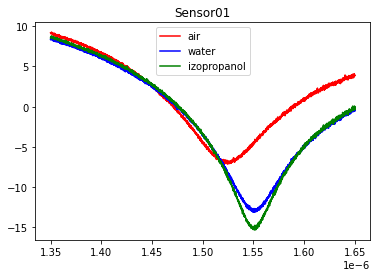

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Sensor01")
ax.plot(S1a_df['wavelength'], S1a_df['amplitude'], label = "air", color = "r")
ax.plot(S1w_df['wavelength'], S1w_df['amplitude'], label = "water", color = "b")
ax.plot(S1i_df['wavelength'], S1i_df['amplitude'], label = "izopropanol", color = "g")
ax.legend(loc = "upper center")
fig.show()

# All datasets analysis

In [ ]:
substances = ["air", "water", "izopropanol"]
sensor_nbrs = [str(sens).zfill(2) for sens in range(1,11)]
filenames = []
for sensor in sensor_nbrs:
  for substance in substances:
    filename = "sensor"+sensor+"_"+substance
    filenames.append(filename)

print(filenames)

['sensor01_air', 'sensor01_water', 'sensor01_izopropanol', 'sensor02_air', 'sensor02_water', 'sensor02_izopropanol', 'sensor03_air', 'sensor03_water', 'sensor03_izopropanol', 'sensor04_air', 'sensor04_water', 'sensor04_izopropanol', 'sensor05_air', 'sensor05_water', 'sensor05_izopropanol', 'sensor06_air', 'sensor06_water', 'sensor06_izopropanol', 'sensor07_air', 'sensor07_water', 'sensor07_izopropanol', 'sensor08_air', 'sensor08_water', 'sensor08_izopropanol', 'sensor09_air', 'sensor09_water', 'sensor09_izopropanol', 'sensor10_air', 'sensor10_water', 'sensor10_izopropanol']


In [ ]:
def load_and_check(filenames):
  dframes = []
  for filename in filenames:
    df = get_sensor_data(filename)
    print(f"\n------------ {filename} ----------")
    print(f"Observations: \n{df.count()}")
    print(f"Unique wavelengths: {len(df['wavelength'].unique())}")
    print(f"NULLS: \n{df.isna().sum()}")
    print(f"MAX: \n{df.max()}")
    print(f"MIN: \n{df.min()}")
    dframes.append(df)

  return dframes

In [ ]:
dframes = load_and_check(filenames)


------------ sensor01_air ----------
Observations: 
wavelength    3001
amplitude     3001
dtype: int64
Unique wavelengths: 3001
NULLS: 
wavelength    0
amplitude     0
dtype: int64
MAX: 
wavelength   0.000001650
amplitude    9.253300000
dtype: float64
MIN: 
wavelength    0.000001350
amplitude    -7.151200000
dtype: float64

------------ sensor01_water ----------
Observations: 
wavelength    3001
amplitude     3001
dtype: int64
Unique wavelengths: 3001
NULLS: 
wavelength    0
amplitude     0
dtype: int64
MAX: 
wavelength   0.000001650
amplitude    8.561300000
dtype: float64
MIN: 
wavelength     0.000001350
amplitude    -13.115000000
dtype: float64

------------ sensor01_izopropanol ----------
Observations: 
wavelength    3001
amplitude     3001
dtype: int64
Unique wavelengths: 3001
NULLS: 
wavelength    0
amplitude     0
dtype: int64
MAX: 
wavelength   0.000001650
amplitude    8.787400000
dtype: float64
MIN: 
wavelength     0.000001350
amplitude    -15.325000000
dtype: float64

-------

In [ ]:
def plot_sensors_data(dframes):
  fig, axs = plt.subplots(2,5, figsize=(25,10))
  for i, ax in enumerate(fig.axes):
    ax.set_title("Sensor"+str(i+1).zfill(2))
    ax.plot(dframes[i*3]['wavelength'], dframes[i*3]['amplitude'], label = "air", color = "r")
    ax.plot(dframes[i*3+1]['wavelength'], dframes[i*3+1]['amplitude'], label = "water", color = "b")
    ax.plot(dframes[i*3+2]['wavelength'], dframes[i*3+2]['amplitude'], label = "izopropanol", color = "g")
    ax.legend(loc = "upper center")
  fig.show()

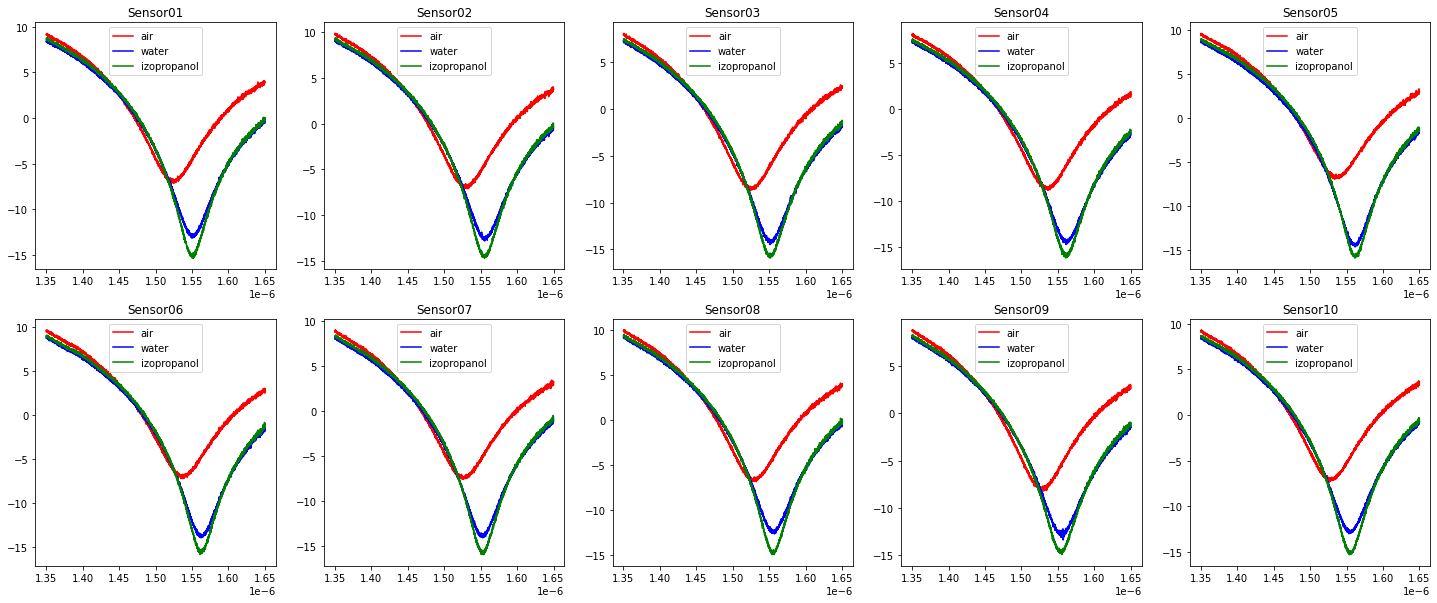

In [ ]:
plot_sensors_data(dframes)

Clean data.
Checking whether wavelengths are common for all measurements

In [ ]:
def plot_sensors_data_2(dframes):
  fig, axs = plt.subplots(2,5, figsize=(25,10))
  for i, ax in enumerate(fig.axes):
    ax.set_title("Sensor"+str(i+1).zfill(2)+" wavelength for air measurements")
    ax.plot(dframes[i*3]['wavelength'], dframes[i*3]['amplitude'], label = "air", color = "r")
    ax.plot(dframes[i*3]['wavelength'], dframes[i*3+1]['amplitude'], label = "water", color = "b")
    ax.plot(dframes[i*3]['wavelength'], dframes[i*3+2]['amplitude'], label = "izopropanol", color = "g")
    ax.legend(loc = "upper center")
  fig.show()

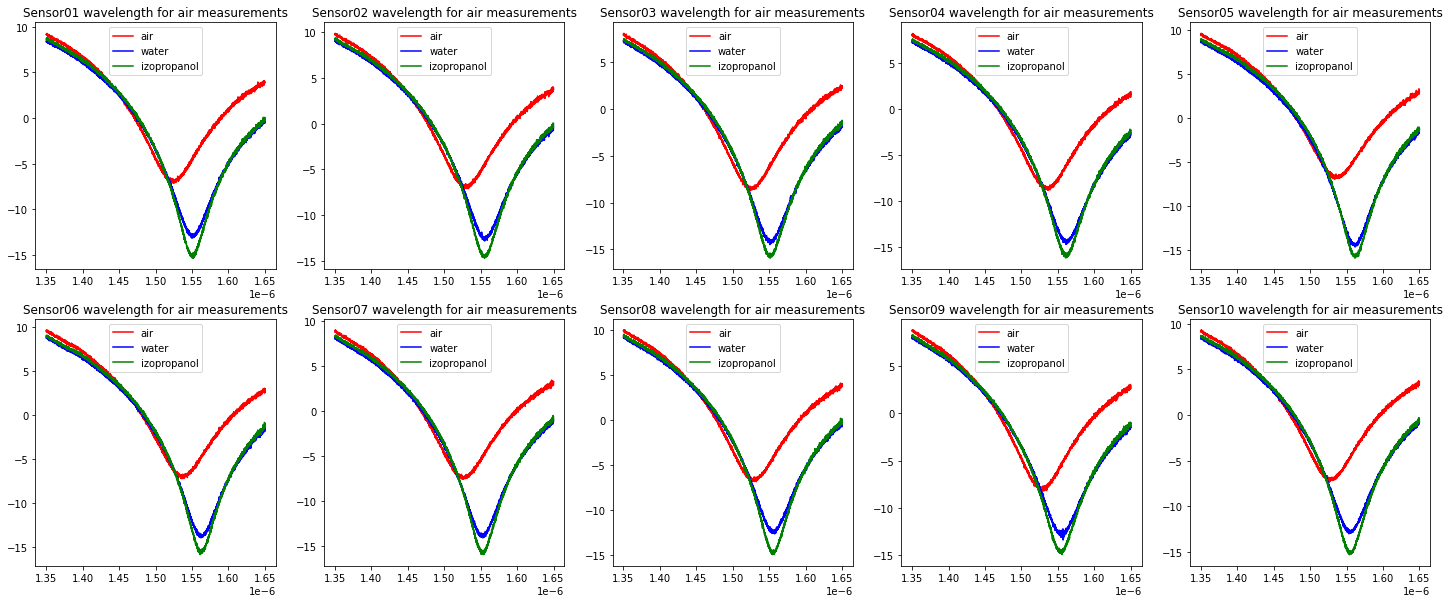

In [ ]:
plot_sensors_data_2(dframes)

In [ ]:
dframes[0]

,wavelength,amplitude
0,0.000001350,9.179200000
1,0.000001350,9.200300000
2,0.000001350,9.196800000
3,0.000001350,9.102800000
4,0.000001350,9.060100000
...,...,...
2996,0.000001650,3.831000000
2997,0.000001650,3.861300000
2998,0.000001650,3.836100000
2999,0.000001650,3.946600000


In [ ]:
dframes[1]

,wavelength,amplitude
0,0.000001350,8.357000000
1,0.000001350,8.428700000
2,0.000001350,8.442200000
3,0.000001350,8.414400000
4,0.000001350,8.403400000
...,...,...
2996,0.000001650,-0.515360000
2997,0.000001650,-0.368590000
2998,0.000001650,-0.571720000
2999,0.000001650,-0.192140000


# Creating datasets for training and testing models

In [ ]:
ds = dframes[0].copy() # all air measurements
ds['y'] = dframes[1][dframes[1]['wavelength'] == ds['wavelength']]['amplitude']
ds

,wavelength,amplitude,y
0,0.000001350,9.179200000,8.357000000
1,0.000001350,9.200300000,8.428700000
2,0.000001350,9.196800000,8.442200000
3,0.000001350,9.102800000,8.414400000
4,0.000001350,9.060100000,8.403400000
...,...,...,...
2996,0.000001650,3.831000000,-0.515360000
2997,0.000001650,3.861300000,-0.368590000
2998,0.000001650,3.836100000,-0.571720000
2999,0.000001650,3.946600000,-0.192140000


In [ ]:
def make_prediction_datasets(dframes):
  water_datasets = []
  izopropanol_datasets = []
  
  for i in range(10):
    wds = dframes[i*3].copy() # all air measurements
    wds.columns = ['X1', 'X2'] # wavelength and amplitude for air become independent variables
    wds['y'] = dframes[i*3+1][dframes[i*3+1]['wavelength'] == wds['X1']]['amplitude'] # amplitude for water assigned to the same wavelength for air becomes dependent variable
    water_datasets.append(wds)

    ids = dframes[i*3].copy() # all air measurements
    ids.columns = ['X1', 'X2'] # wavelength and amplitude for air become independent variables
    ids['y'] = dframes[i*3+2][dframes[i*3+2]['wavelength'] == ids['X1']]['amplitude'] # amplitude for izopropanol assigned to the same wavelength for air becomes dependent variable
    izopropanol_datasets.append(ids)

  return water_datasets, izopropanol_datasets

In [ ]:
water_ds, izopropanol_ds = make_prediction_datasets(dframes)

In [ ]:
def plot_prediction_datasets(datasets):
  fig, axs = plt.subplots(2,5, figsize=(25,10))
  for i, ax in enumerate(fig.axes):
    ax.set_title("Sensor"+str(i+1).zfill(2))
    ax.plot(datasets[i]['X1'], datasets[i]['X2'], label = "air", color = "r")
    ax.plot(datasets[i]['X1'], datasets[i]['y'], label = "y", color = "b")
    ax.legend(loc = "upper center")
  fig.show()

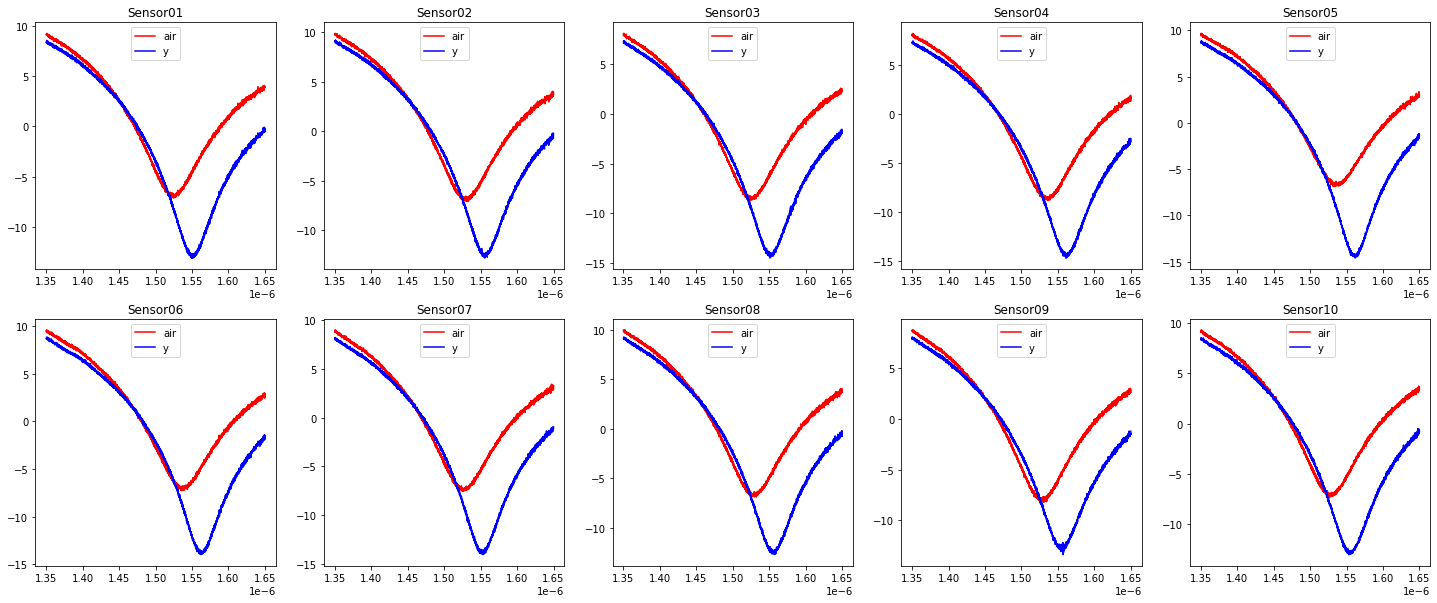

In [ ]:
plot_prediction_datasets(water_ds)

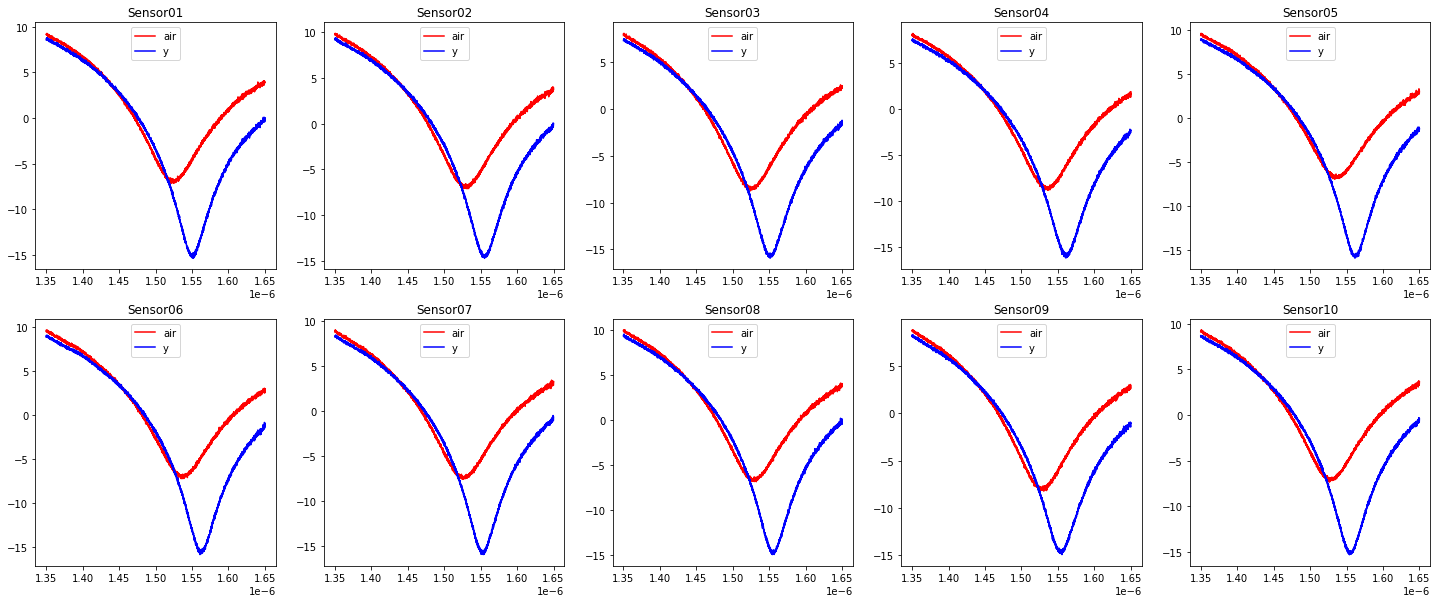

In [ ]:
plot_prediction_datasets(izopropanol_ds)

In [ ]:
water_pred = pd.concat(water_ds, ignore_index=True)
izopropanol_pred = pd.concat(izopropanol_ds, ignore_index=True)

In [ ]:
water_pred

,X1,X2,y
0,0.000001350,9.179200000,8.357000000
1,0.000001350,9.200300000,8.428700000
2,0.000001350,9.196800000,8.442200000
3,0.000001350,9.102800000,8.414400000
4,0.000001350,9.060100000,8.403400000
...,...,...,...
30005,0.000001650,3.278400000,-0.865650000
30006,0.000001650,3.421300000,-0.844350000
30007,0.000001650,3.311200000,-0.973830000
30008,0.000001650,3.450000000,-0.638490000


In [ ]:
def plot_prediction_datasets_2(dataset, title):
  fig, ax = plt.subplots()
  ax.set_title(title)
  ax.scatter(dataset['X1'], dataset['X2'], label = "air", color = "r")
  ax.scatter(dataset['X1'], dataset['y'], label = "y", color = "b")
  ax.legend(loc = "upper center")
  fig.show()

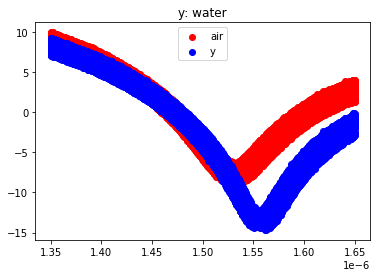

In [ ]:
plot_prediction_datasets_2(water_pred, "y: water")

In [ ]:
izopropanol_pred

,X1,X2,y
0,0.000001350,9.179200000,8.555100000
1,0.000001350,9.200300000,8.675000000
2,0.000001350,9.196800000,8.711600000
3,0.000001350,9.102800000,8.715700000
4,0.000001350,9.060100000,8.679200000
...,...,...,...
30005,0.000001650,3.278400000,-0.614780000
30006,0.000001650,3.421300000,-0.536290000
30007,0.000001650,3.311200000,-0.818380000
30008,0.000001650,3.450000000,-0.572020000


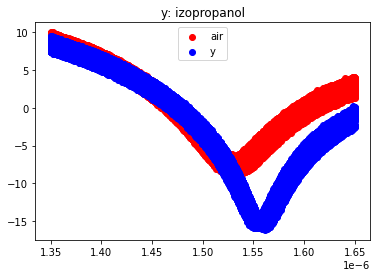

In [ ]:
plot_prediction_datasets_2(izopropanol_pred, "y: izopropanol")

In [ ]:
path2 = "drive/MyDrive/Colab_Notebooks/SDA_Upskill/"
water_pred.to_csv(path2+"water.csv", sep="\t")
izopropanol_pred.to_csv(path2+"izopropanol.csv", sep="\t")